In [1]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import scipy
import matplotlib.pyplot  as plt
import glob
import moviepy.editor     as mpy
import nbimporter

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation

import SpaceDifferentiationOperators as SD 
import TimeDifferentiationOperators as TD
from SpaceDifferentiationOperators import SpaceDiff
from TimeDifferentiationOperators  import TimeDiff

In [12]:
x   = np.arange(0 , 101, dtype=double)*2*pi/100
t   = np.arange(0 , 201, dtype=double)*2*pi/200
SC  = sin(x)
PHI = np.zeros((t.size,x.size))
PHI[0] = SC

D   = SD.SBP42SAT(2*pi/100,1,101)
T   = TD.RK4(2*pi/200, D)

In [13]:
T.diff(PHI)

In [14]:
T.l2HNorm(PHI)

array([3.65445799e-19, 4.25083973e-18, 2.82026867e-18, 2.99738699e-19,
       1.36244863e-19, 5.39529658e-18, 5.17730480e-18, 1.58044041e-18,
       1.19895480e-18, 7.62971234e-19, 5.44979453e-19, 4.90481508e-19,
       1.79843219e-18, 6.53975343e-19, 1.30795069e-18, 3.26987672e-19,
       9.48264248e-18, 1.63493836e-18, 7.84770412e-18, 3.05188494e-18,
       4.57782740e-18, 3.05188494e-18, 3.48786850e-18, 5.66778631e-18,
       3.16088083e-18, 6.97573700e-18, 1.19895480e-18, 8.39268357e-18,
       2.83389315e-18, 7.08473289e-18, 9.70063426e-18, 7.62971234e-19,
       6.43075754e-18, 3.26987672e-19, 1.10085849e-17, 3.26987672e-18,
       1.08995891e-17, 2.17991781e-18, 6.53975343e-19, 9.42814453e-18,
       1.08995891e-18, 2.67039932e-18, 5.34079864e-18, 3.59686439e-18,
       4.30533768e-18, 8.12019385e-18, 1.17170582e-18, 7.08473289e-19,
       2.27528922e-18, 6.45800652e-18, 8.03184757e-18, 1.22892867e-17,
       2.43878305e-18, 4.08734590e-19, 1.23437846e-17, 7.30272467e-18,
      

<IPython.core.display.Javascript object>


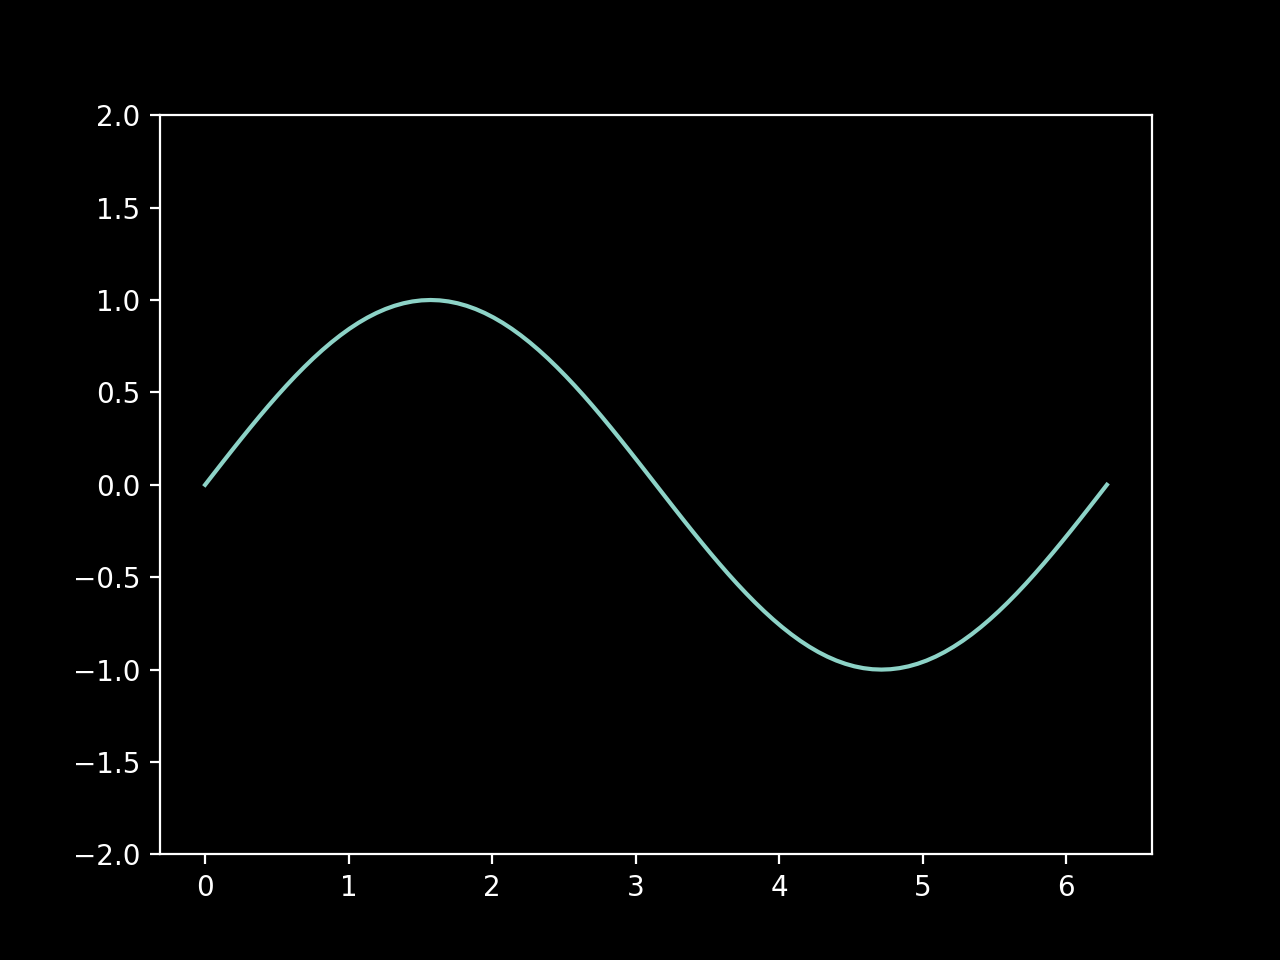

In [15]:
#-ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(x,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    ax.plot(x,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1, repeat = False)